In [4]:
import tensorflow as tf

In [5]:
import pandas as pd
import numpy as np

In [6]:
import pydot

In [7]:
D=pd.read_excel('http://data.hossam.kr/E04/cars.xlsx')

In [8]:
data=pd.DataFrame(D)

In [9]:
data.head(2)

,speed,dist
0,4,2
1,4,10


## 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

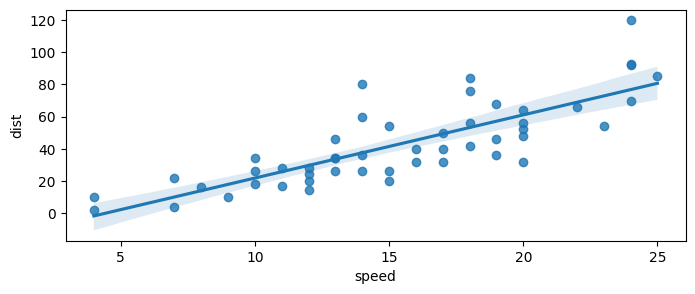

In [11]:
plt.figure(figsize=(8,3))
sb.regplot(data=data,x='speed',y="dist")
plt.show()
plt.close()

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


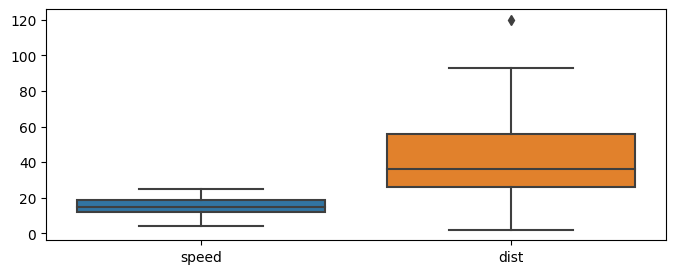

In [12]:
plt.figure(figsize=(8,3))
sb.boxplot(data=data)
plt.show()
plt.close()

## 모델 형성

In [13]:
target="dist"

### 데이터 분할

In [14]:
import statsmodels.api as sm
import sklearn.model_selection as skmod

In [15]:
train,test=skmod.train_test_split(data,train_size=0.7,random_state=3)

### ANN 학습모델 만들기

In [16]:
import tensorflow.keras as keras

In [17]:
model=keras.models.Sequential()
# 1차원의 데이터를 입력으로 받고 32개의 출력을 가지는 첫 번쨰 Dense
model.add(keras.layers.Dense(64, activation="linear",input_shape=(1,)))
# input_shape는 Dimension을 의미
model.add(keras.layers.Dense(1,activation='linear'))
model.compile(optimizer='adam',loss="mse",metrics=["mse"])

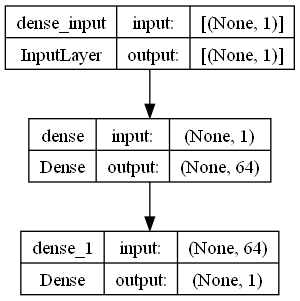

In [42]:
keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [45]:
dir(keras.utils)

['CustomObjectScope',
 'FeatureSpace',
 'GeneratorEnqueuer',
 'OrderedEnqueuer',
 'Progbar',
 'Sequence',
 'SequenceEnqueuer',
 'SidecarEvaluator',
 'TimedThread',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'array_to_img',
 'audio_dataset_from_directory',
 'custom_object_scope',
 'deserialize_keras_object',
 'disable_interactive_logging',
 'enable_interactive_logging',
 'experimental',
 'get_custom_objects',
 'get_file',
 'get_registered_name',
 'get_registered_object',
 'get_source_inputs',
 'image_dataset_from_directory',
 'img_to_array',
 'is_interactive_logging_enabled',
 'legacy',
 'load_img',
 'model_to_dot',
 'normalize',
 'pack_x_y_sample_weight',
 'pad_sequences',
 'plot_model',
 'register_keras_serializable',
 'save_img',
 'serialize_keras_object',
 'set_random_seed',
 'split_dataset',
 'text_dataset_from_directory',
 'timeseries_dataset_from_array',
 'to_categorical',
 'to_ordinal',
 'unpack

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 학습 : fit

In [20]:
result=model.fit(train["speed"],train[target],epochs=300,validation_data=(test["speed"],test["dist"]))

Epoch 1/300


2/2 [==============================] - 1s 183ms/step - loss: 2058.2747 - mse: 2058.2747 - val_loss: 2578.8489 - val_mse: 2578.8489
Epoch 2/300
2/2 [==============================] - 0s 39ms/step - loss: 2004.8451 - mse: 2004.8451 - val_loss: 2515.0947 - val_mse: 2515.0947
Epoch 3/300
2/2 [==============================] - 0s 53ms/step - loss: 1950.5862 - mse: 1950.5862 - val_loss: 2452.0574 - val_mse: 2452.0574
Epoch 4/300
2/2 [==============================] - 0s 78ms/step - loss: 1898.9685 - mse: 1898.9685 - val_loss: 2389.6516 - val_mse: 2389.6516
Epoch 5/300
2/2 [==============================] - 0s 64ms/step - loss: 1847.6201 - mse: 1847.6201 - val_loss: 2328.0471 - val_mse: 2328.0471
Epoch 6/300
2/2 [==============================] - 0s 52ms/step - loss: 1797.4305 - mse: 1797.4305 - val_loss: 2267.7939 - val_mse: 2267.7939
Epoch 7/300
2/2 [==============================] - 0s 53ms/step - loss: 1749.2133 - mse: 1749.2133 - val_loss: 2210.7959 - val_mse: 2210.7959
Epoch 8/300
2/2 [

In [21]:
result.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [22]:
df=pd.DataFrame(result.history)

여기서 loss : 학습데이터의 예측값과 실제값 사이의 차이          
val_loss : 검증데이터와 그 예측값 사이의 차이

### 시각화 해서 볼까

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

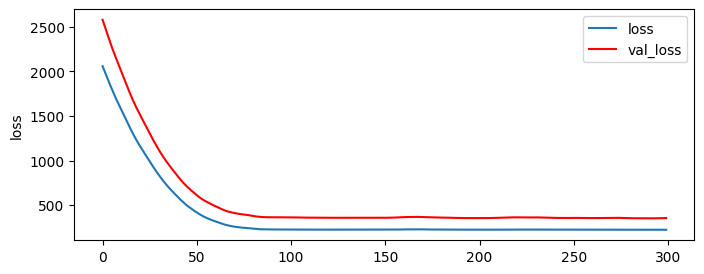

In [23]:
plt.figure(figsize=(8,3))
sb.lineplot(data=df,x=df.index,y='loss',label="loss")
sb.lineplot(data=df,x=df.index,y='val_loss',label="val_loss",color="red")
plt.show()
plt.close()

### 모델평가

#### train

In [24]:
pred_train=model.predict(train["speed"]).squeeze()

2/2 [==============================] - 0s 3ms/step


In [25]:
train["pred_train"]=pred_train

#### test data

In [26]:
pred_test=model.predict(test["speed"]).squeeze()

1/1 [==============================] - 0s 36ms/step


In [27]:
test["pred_test"]=pred_test

c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

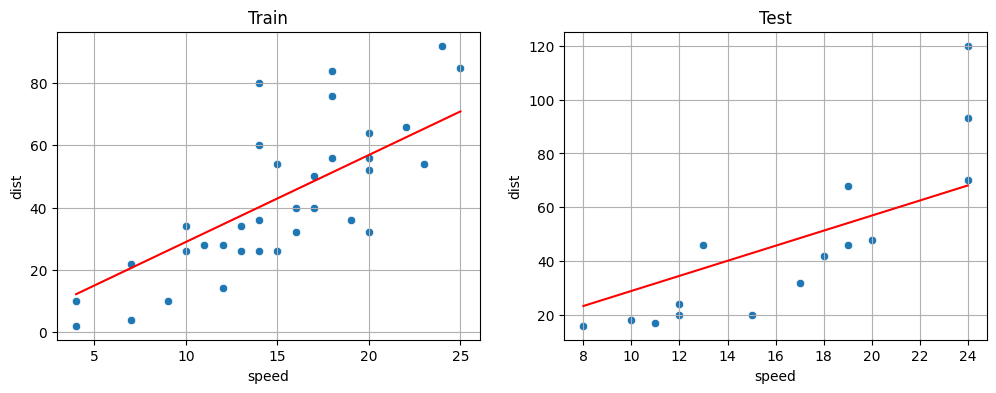

In [28]:
_,a=plt.subplots(1,2,figsize=(12,4))
sb.scatterplot(data=train,x=train["speed"],y=train['dist'],ax=a[0])
sb.lineplot(data=train,x=train["speed"],y=train['pred_train'],ax=a[0],color="red")
sb.scatterplot(data=test,x=test["speed"],y=test['dist'],ax=a[1])
sb.lineplot(data=test,x=test["speed"],y=test['pred_test'],ax=a[1],color="red")
a[0].grid()
a[0].set_title("Train")
a[1].grid()
a[1].set_title("Test")
plt.show()
plt.close()

### 콜백함수

|구분|종류|설명|코드|비고|
|--|--|--|--|--|
|1| EarlyStopping| 모델 학습시에 지정된 기간동안 모니터링하는 평가지표에서 성능향상이 이루어지지 않으면 중단|EarlyStopping(monitor="평가지표,patience="지정된 기간",verbose="0:표시하지않음 1: 프로세스바로 표시 2: 매 에폭마다 수행과정을 자세히 표시")||
|2| ReduceLROnPlateau| 지정한 기능동안 평가지표의 성능향상이 관측되지않으면 학습률을 조정함|ReduceLROnPlateau(monitor="평가지표",factor="조정치",patience="위와 동일",min_lr="학습률의 하한을 지정,varbose="콜백의 수행과정과정 노출 여부를 지정")|새로운 학습률=factor x 기존학습률|
|3| ModelCheckpoint|지정된 평가지료를 기준으로 가장 뛰어난 성능을 보여주는 모델을 저장할 때 사용|ModelCheckpoint

In [29]:
import sklearn.preprocessing as skpre

In [30]:
#min
pre_D=skpre.minmax_scale(D)

In [31]:
skpre.scale

<function sklearn.preprocessing._data.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)>

In [32]:
skpre.robust_scale

<function sklearn.preprocessing._data.robust_scale(X, *, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)>

In [33]:
D["speed2"]=D["speed"]

In [34]:
D

,speed,dist,speed2
0,4,2,4
1,4,10,4
2,7,4,7
3,7,22,7
4,8,16,8
5,9,10,9
6,10,18,10
7,10,26,10
8,10,34,10
9,11,17,11
